In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import time
import sys
sys.path.insert(1, '../pid')

from pca9685_driver import Device
from pid_lib import pid

dev = Device(0x40,1)
dev.set_pwm_frequency(50)

In [3]:
led = 5 # dev channel 5

pid_led_output = 0 # sensor from output
pid_led = pid(output=pid_led_output, 
              setpoint=pid_led_output,
              feedback=pid_led_output,
              Kp=0.001, Ki=0.2806, Kd=0.01003)

led_control 4085


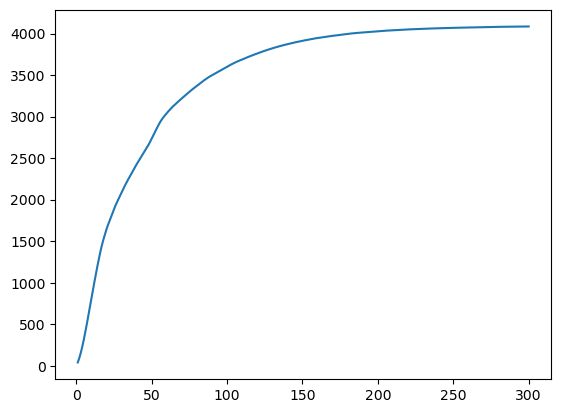

In [4]:
x = []
y = []
count = 0
while (count<300):
    feedback = pid_led_output # sensor from output
    pid_led_output = pid_led.pid_update_(
                    feedback=feedback,setpoint=4094)
    led_control = int(pid_led_output)
    #print('led_control', led_control)
    if led_control>4094:#clamp
        led_control = 440
    if led_control<0:#clamp
        led_control = 240
    dev.set_pwm(led, led_control)
    count +=1
    y.append(pid_led_output)
    x.append(count)
    #time.sleep(1)
plt.plot(x, y)
print('led_control', led_control)

In [5]:
servo = 0 # dev channel 0

pid_servo_output = 240 # sensor from output
pid_servo = pid(output=pid_servo_output, 
                setpoint=pid_servo_output,
                feedback=pid_servo_output,
                Kp=0.05, Ki=2, Kd=0.0001)

servo_control 240


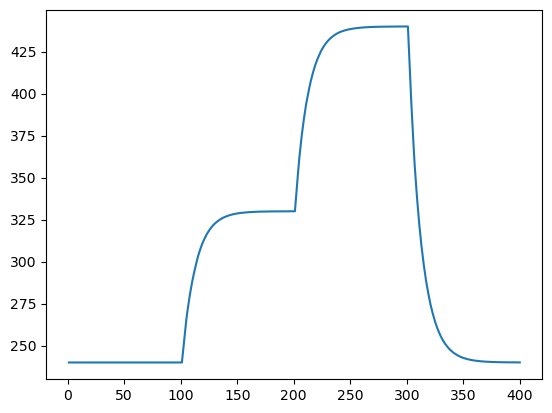

In [6]:
x = []
y = []
count = 0
setpoint = 240
while (count<400):
    feedback = pid_servo_output # sensor from output
    pid_servo_output = pid_servo.pid_update_(
        feedback=feedback, setpoint=setpoint)
    servo_control = int(pid_servo_output)
    #print('servo_control', servo_control)
    if servo_control>440:#clamp
        servo_control = 440
    if servo_control<240:#clamp
        servo_control = 240
    dev.set_pwm(servo, servo_control)
    # servo limits
    # min = 240(1ms pulse), 
    #neutro = 330(1.5ms pulse), max = 440(2ms pulse)
    dev.set_pwm(1, servo_control)# monitor
    count +=1
    y.append(pid_servo_output)
    x.append(count)
    #time.sleep(1)
    if count >100:
        setpoint =330
    if count >200:
        setpoint =440
    if count >300:
        setpoint =240
        
plt.plot(x, y)
print('servo_control', servo_control)